# Fitting Models Exercise 2

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()
with np.load('decay_osc.npz') as data:
    t = data['tdata']
    y = data['ydata']
    dy = data['dy']

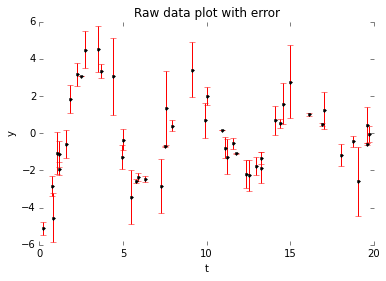

In [22]:
plt.errorbar(t, y, dy, fmt='.k', ecolor='red')
plt.xlabel('t')
plt.ylabel('y')
plt.box(False)
plt.title('Raw data plot with error')

In [4]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [16]:
# YOUR CODE HERE
# raise NotImplementedError()

def model(t, A, l, w, d):
    b = np.exp(-l * t)
    c = np.cos(w * t)
    q = A*b *c + d
    return q

In [17]:
theta_best, theta_cov = opt.curve_fit(model, t, y, absolute_sigma=True)

In [18]:
print('A = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('B = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))

A = -5.285 +/- 0.520
B = 0.071 +/- 0.014


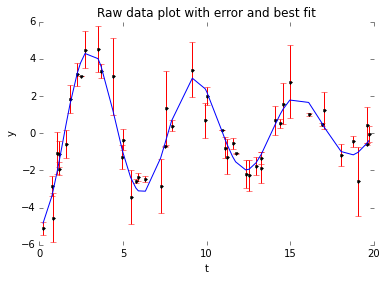

In [24]:
plt.errorbar(t, y, dy, fmt='.k', ecolor='red')
plt.xlabel('t')
plt.ylabel('y')
plt.box(False)
yfit = model(t, theta_best[0], theta_best[1], theta_best[2], theta_best[3])
plt.plot(t, yfit)
plt.title('Raw data plot with error and best fit')

In [6]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors